<a href="https://colab.research.google.com/github/ChenghenChen/Slum/blob/main/OSM%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [1]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 976.2 kB/s eta 0:00:00


In [2]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [ ]:
# to know the correct format we either guess or we go on the OSM website click on a point on their map to find out what it's called

In [3]:
https://www.openstreetmap.org/

SyntaxError: invalid syntax (<ipython-input-3-a583e92ee487>, line 1)

In [ ]:
# right click anywhere >> query function

In [4]:
PLACE_NAME = "Embajadores"
graph = osmnx.graph_from_place(PLACE_NAME)

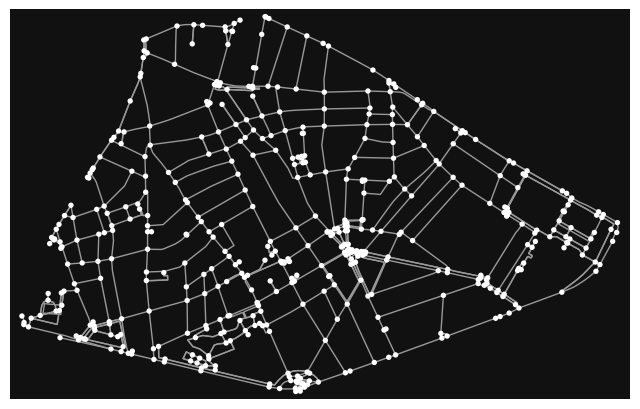

In [5]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [13]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True,"amenity": "school","amenity": "hospital"}
)

print(buildings)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-543610e5dec3>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(


                        source  \
element_type osmid               
node         1517405732    NaN   
way          23571976      NaN   
             29993106      NaN   
             48761409      NaN   
             48761444      NaN   
...                        ...   
relation     17528297      NaN   
             17528298      NaN   
             17528299      NaN   
             17528300      NaN   
             17528301      NaN   

                                                                  geometry  \
element_type osmid                                                           
node         1517405732                          POINT (-3.69544 40.40933)   
way          23571976    POLYGON ((-3.70992 40.40748, -3.70963 40.40749...   
             29993106    POLYGON ((-3.69480 40.40902, -3.69419 40.40984...   
             48761409    POLYGON ((-3.70361 40.40800, -3.70344 40.40775...   
             48761444    POLYGON ((-3.70023 40.40613, -3.70006 40.40619...   
...        

In [ ]:
# sometimes the buildings are just a point like "node" above instead of it being a contour (polygon) which would create empty spots in our plot

<Axes: >

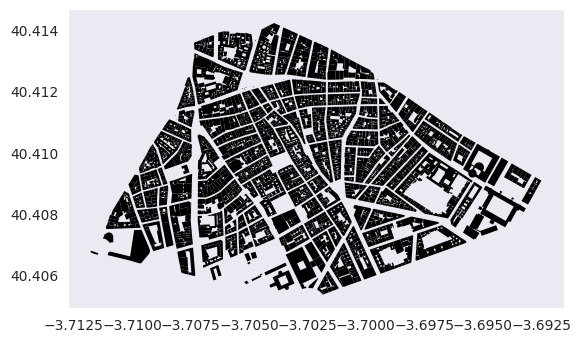

In [14]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [15]:
schools = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity":"school"
    }
)
schools.head()

<ipython-input-15-47e379369a37>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  schools = osmnx.geometries_from_place(


addr:city addr:housenumber addr:postcode  \
element_type osmid                                                 
node         266168383     Madrid               15         28012   
             1572572778    Madrid                3         28012   
way          29046209         NaN               70         28012   
             29046215         NaN                7         28005   
             48761440         NaN               14         28005   

                                     addr:street amenity isced:level  \
element_type osmid                                                     
node         266168383   Calle del Duque de Alba  school           5   
             1572572778        Calle de Argumosa  school         NaN   
way          29046209       Calle de Embajadores  school           2   
             29046215           Calle del Casino  school         0;1   
             48761440      Calle del Ventorrillo  school         0;1   

                                                                      name  \
element_type osmid                                                           
node         266168383                      Antiguo Centro de Estudios Sol   
             1572572778                                      Diagonal;UNED   
way          29046209          Instituto de Educación Secundaria Cervantes   
             29046215    Colegio de Educación Infantil y Primaria Santa...   
             48761440    Colegio de Educación Infantil y Primaria Emili...   

                        operator:type                      phone  \
element_type osmid                                                 
node         266168383        private               +34913690411   
             1572572778           NaN                        NaN   
way          29046209          public  +34915285061;+34915285512   
             29046215          public               +34915275281   
             48761440          public               +34915306059   

                        ref:educamadrid  ... school:language  \
element_type osmid                       ...                   
node         266168383         28029263  ...             NaN   
             1572572778             NaN  ...             NaN   
way          29046209          28004059  ...           es;en   
             29046215          28006381  ...             NaN   
             48761440          28005349  ...           es;en   

                                      short_name  \
element_type osmid                                 
node         266168383                       NaN   
             1572572778                      NaN   
way          29046209              IES Cervantes   
             29046215           CEIP Santa María   
             48761440    CEIP Emilia Pardo Bazán   

                                                                  website  \
element_type osmid                                                          
node         266168383                                                NaN   
             1572572778                                               NaN   
way          29046209    http://www.educa.madrid.org/ies.cervantes.madrid   
             29046215    http://www.educa.madrid.org/cp.santamaria.madrid   
             48761440    http://www.educa.madrid.org/cp.pardobazan.madrid   

                          wikidata                               wikipedia  \
element_type osmid                                                           
node         266168383         NaN                                     NaN   
             1572572778        NaN                                     NaN   
way          29046209     Q5806253  es:Instituto de Bachillerato Cervantes   
             29046215          NaN                                     NaN   
             48761440    Q63229876                                     NaN   

                        name:etymology:wikidata building ways building:levels  \
element_type osmid                  

### 🎢 Putting it all together in one map

In [ ]:
# these random blue dots showed up
# to figure out why, she removed each line of code separately to find out which line of code is giving the error
# so she found out it's the buildings that are defined as a point (node) above
# facecolor for polygons
# color is for dots
# edgecolor is for edges (streets)

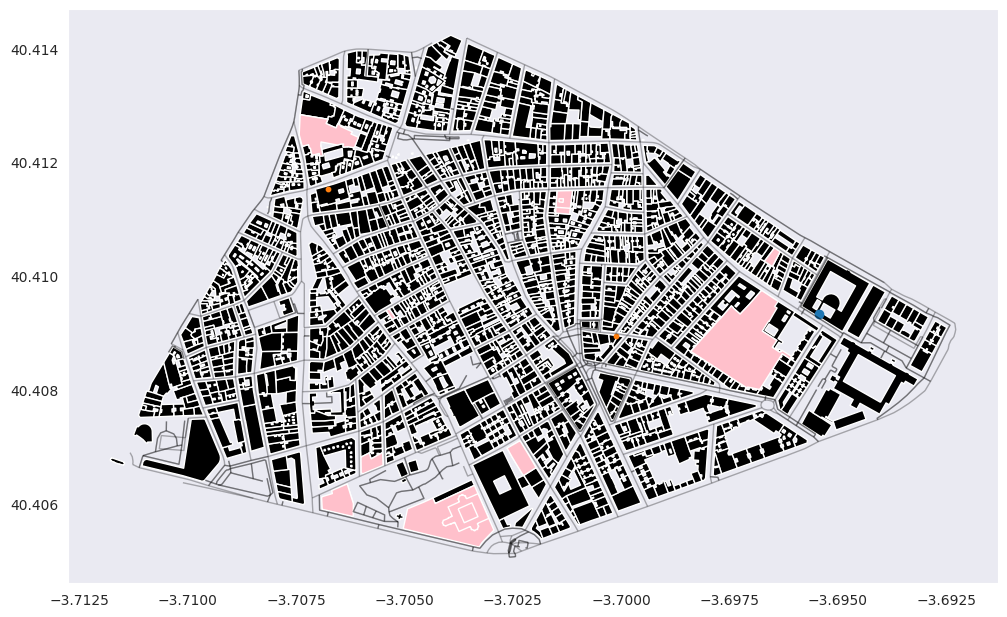

In [18]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
schools.plot(ax=ax, facecolor="pink", markersize=10)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

In [ ]:
# we're adding a red dot on the map

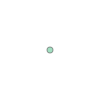

In [ ]:
coords = (2.2011003,41.3989949)
p = Point(coords)
p

In [ ]:
print(p.x, p.y)

2.2011003 41.3989949


In [ ]:
# we make sure the crs of the point takes the same crs of the map

In [ ]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

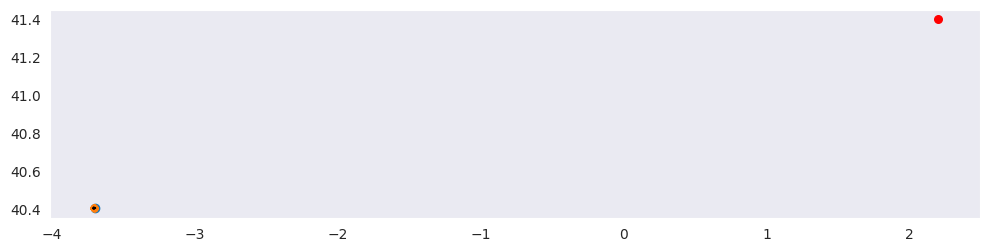

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geom.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [ ]:
# if a place is in their library then we can extract it specifically

In [ ]:
our_place = "Casino l'Aliança del Poblenou"  # "Institute for Advanced Architecture of Catalonia"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


,geometry,address
0,POINT (2.20336 41.39986),"Casino l'Aliança del Poblenou, Rambla del Pobl..."


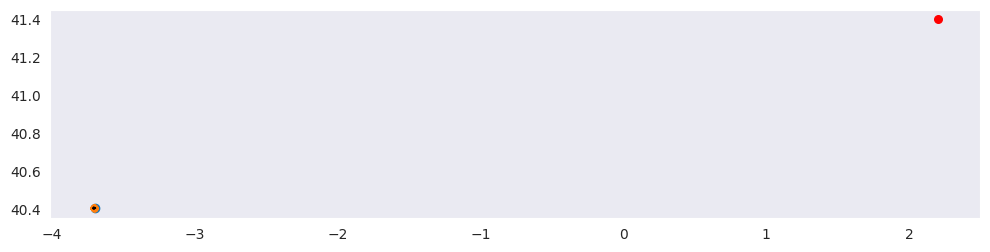

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [ ]:
rad = p.buffer(0.008 * 0.5)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


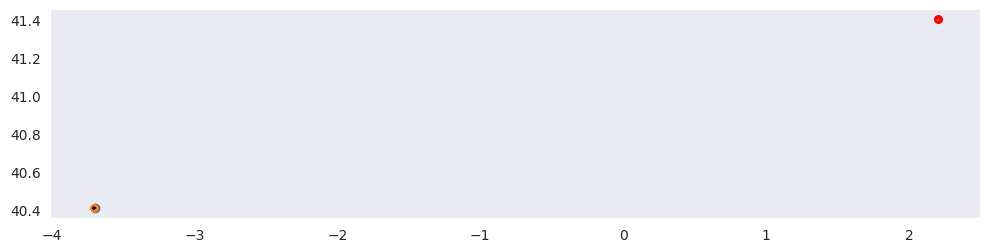

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

plt.show()

In [ ]:
# defining which restaurants we will consider as "accessible"

In [ ]:
accessible_restaurants = [r for r in restaurants["geometry"] if isinstance(r, Point) and r.within(rad["geometry"][0])]
accessible_restaurants = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_restaurants,
    },
    crs=buildings.crs
)

ValueError: aspect must be finite and positive 

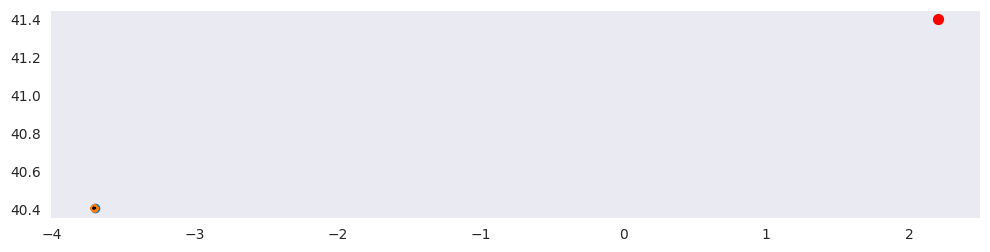

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
restaurants.plot(ax=ax, facecolor="pink", markersize=10, alpha=0.7)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

accessible_restaurants.plot(ax=ax, facecolor="purple", markersize=20, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

In [ ]:
zone = edges.unary_union.convex_hull
zone

In [ ]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [ ]:
# we define both points and then use shortest distance

In [ ]:
origin = (
    osmnx.geocode_to_gdf("Institute for Advanced Architecture of Catalonia")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Jardins de l'Arenal de Llevant")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

In [ ]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [ ]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

### 🕸 Walkability analysis

How far can you reach from a place on foot?

In [ ]:
# we can't calculate it from any point (like the iaac node we added) we have to check what's the nearest node on the OMNx network and we calculate from that

In [ ]:
# getting iaac node from the graph: (the node we wanna calculate distances from)
iaac_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only: (we cut the graph according where we can walk)
g = osmnx.truncate.truncate_graph_dist(graph, iaac_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.